<a href="https://colab.research.google.com/github/DeepHiveMind/Models-used-in-Deep-Learning-and-Deep-Reinforcement-Learning/blob/master/Copy_of_Sentiment_Analysis_on_Reddit_Headlines_with_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Reddit News Headlines with Python’s Natural Language Toolkit (NLTK)

In [0]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [0]:
!pip install -q praw

In [0]:
import praw

reddit = praw.Reddit(client_id='68BmtbG2YtzdNQ',
                     client_secret='vmGWPMblu21-JDaSq81CuRkK2vE',
                     user_agent='reddit_by_dhrub')

In [0]:
headlines = set()

In [0]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

941


In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    #print(pol_score)
    #pprint(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.4404,
  'headline': "Would Trump's AG nominee bury a Russia scandal report from Mueller?",
  'neg': 0.244,
  'neu': 0.756,
  'pos': 0.0},
 {'compound': 0.3182,
  'headline': "Trump says solution to shutdown impasse 'so simple'",
  'neg': 0.0,
  'neu': 0.753,
  'pos': 0.247},
 {'compound': -0.8625,
  'headline': 'Pence Insists ISIS Has Been Defeated Same Day Terror Group Claims Syria Attack',
  'neg': 0.49,
  'neu': 0.51,
  'pos': 0.0}]


In [0]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
results

In [0]:
df = pd.DataFrame(results)
df.head()

,compound,headline,neg,neu,pos
0,-0.4404,Would Trump's AG nominee bury a Russia scandal...,0.244,0.756,0.000
1,0.3182,Trump says solution to shutdown impasse 'so si...,0.000,0.753,0.247
2,-0.8625,Pence Insists ISIS Has Been Defeated Same Day ...,0.490,0.510,0.000
3,0.0000,Trump ‘considering recognising’ Venezuela oppo...,0.000,1.000,0.000
4,-0.2500,Justices Express Skepticism of Tennessee Law o...,0.200,0.800,0.000


In [0]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,-0.4404,Would Trump's AG nominee bury a Russia scandal...,0.244,0.756,0.000,-1
1,0.3182,Trump says solution to shutdown impasse 'so si...,0.000,0.753,0.247,1
2,-0.8625,Pence Insists ISIS Has Been Defeated Same Day ...,0.490,0.510,0.000,-1
3,0.0000,Trump ‘considering recognising’ Venezuela oppo...,0.000,1.000,0.000,0
4,-0.2500,Justices Express Skepticism of Tennessee Law o...,0.200,0.800,0.000,-1


In [0]:
df2 = df[['headline', 'label']]

In [0]:
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [0]:
df.label.value_counts()

 0    431
-1    331
 1    179
Name: label, dtype: int64

In [0]:
print("Positive headlines:\n")

#Doubt to clear

pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["Trump says solution to shutdown impasse 'so simple'",
 'T-Mobile executives stayed at Trump’s hotel while merger that needed administration’s approval was pending',
 'Pelosi Pulls State Of The Union Surprise On Trump',
 'Sen. Rand Paul says the free market pushed him to Canada for surgery',
 'Seven Trump Accusers’ Stories Take the Stage in ‘The Pussy Grabber Plays’ — A vital new collection of plays continues the work that Trump’s accusers started, amplifying their stories to anyone '
 'who’s still listening.']

Negative headlines:

["Would Trump's AG nominee bury a Russia scandal report from Mueller?",
 'Pence Insists ISIS Has Been Defeated Same Day Terror Group Claims Syria Attack',
 'Justices Express Skepticism of Tennessee Law on Liquor Stores',
 'House passes disaster relief bill to fund government through Feb. 8',
 'Republicans Seem to Think Our Russia Problems Are Over?']


In [0]:
df.label.value_counts(normalize=True) * 100

 0    45.802338
-1    35.175345
 1    19.022317
Name: label, dtype: float64

 0    45.802338
-1    35.175345
 1    19.022317
Name: label, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


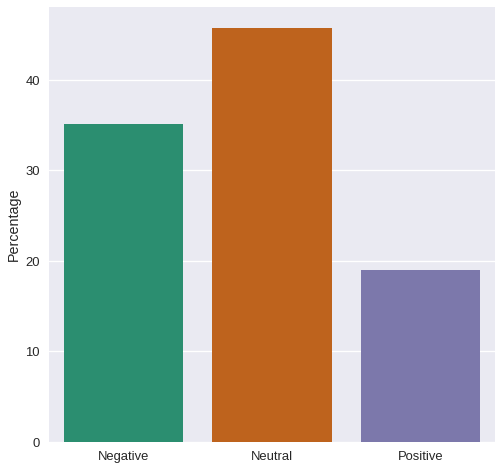

In [0]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100
print(counts)

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [0]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [0]:
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))

['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'isn', 't', 'a', 'very', 'informative', 'one']


In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [0]:
#STUDY FROM HERE

def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [0]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 69),
 ('shutdown', 25),
 ('ocasio', 17),
 ('cortez', 17),
 ('says', 16),
 ('house', 13),
 ('government', 12),
 ('barr', 12),
 ('wall', 10),
 ('administration', 9),
 ('state', 9),
 ('u', 8),
 ('could', 8),
 ('william', 8),
 ('security', 8),
 ('committee', 8),
 ('pelosi', 7),
 ('union', 7),
 ('help', 7),
 ('donald', 7)]

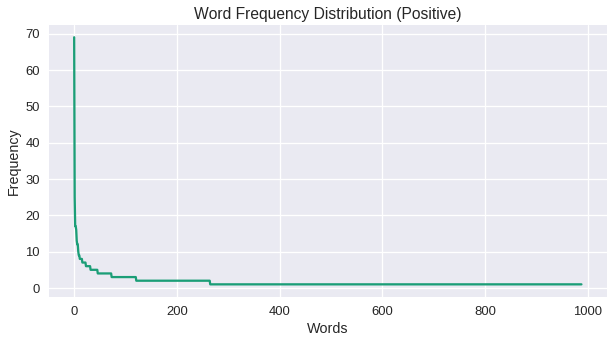

In [0]:
y_val = [x[1] for x in pos_freq.most_common()]
y_val

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

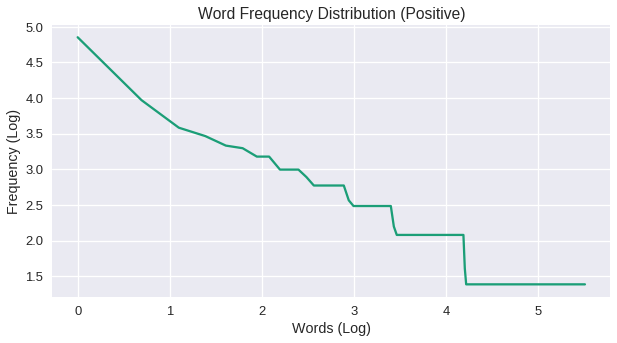

In [0]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [0]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 116),
 ('shutdown', 66),
 ('says', 24),
 ('government', 23),
 ('us', 23),
 ('state', 22),
 ('attack', 21),
 ('pelosi', 21),
 ('syria', 20),
 ('house', 20),
 ('u', 18),
 ('white', 18),
 ('russia', 17),
 ('king', 16),
 ('union', 16),
 ('democrats', 15),
 ('federal', 15),
 ('isis', 13),
 ('steve', 13),
 ('wall', 12)]

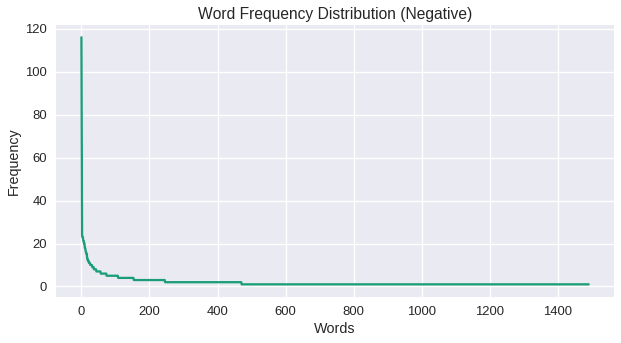

In [0]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

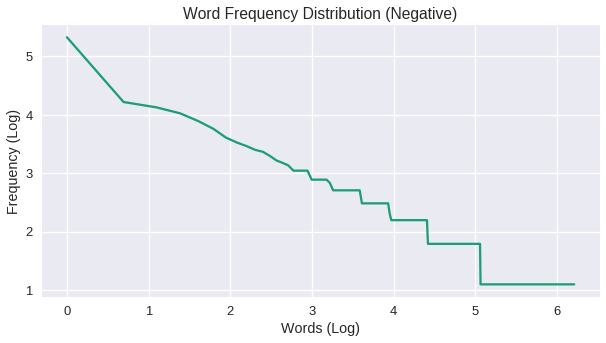

In [0]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()